### Угадываем признак

In [70]:
import pandas as pd
import numpy as np

In [72]:
data = pd.read_csv('./sample_data/athletes.csv')

Посмотрим много ли в наших признаках пустых значений

In [75]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [77]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]

In [78]:
y = data['sex']

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [80]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [81]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
 

In [82]:
le.fit( data['sex'] )

LabelEncoder()

In [84]:
y = pd.Series( data = le.transform( data['sex'] ) )


In [85]:
model = LogisticRegression()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
from sklearn.metrics import roc_curve

In [89]:
predictions = model.predict_proba(X_test)

In [90]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])


In [91]:
from matplotlib import pyplot as plt

In [92]:
def roc_curve1(y_true, y_prob):
    fpr = []
    tpr = []
    positive = np.sum(y_true == 1)
    negative = np.sum(y_true == 0)
    for threshold in y_prob:
        tp = np.count_nonzero((y_prob >= threshold) & (y_true == 1))
        tn = np.count_nonzero((y_prob <= threshold) & (y_true == 0))
        fpr_item = 1 - (tn * 1.0)/negative
        tpr_item = (tp * 1.0) / positive
        fpr.append(fpr_item)
        tpr.append(tpr_item)
    fpr.sort()
    tpr.sort()
    return (fpr, tpr)

In [93]:
fpr1, tpr1 = roc_curve1( y_test, predictions[:, 1])

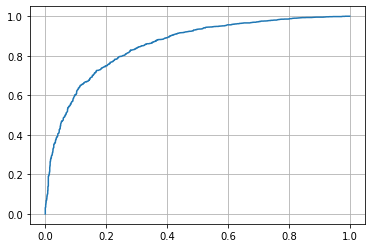

In [95]:
plt.plot(fpr1, tpr1)

plt.grid()

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
roc_auc_score(y_test, predictions[:, 1])

0.855575028419856

In [ ]:
def prescision(prediction, answers):
  n = len(predictions)
  tP = 0
  tN = 0
  fP = 0
  fN = 0
  for i in range(n):
    p = prediction[i]
    a = answers[i]
    if a > 0:
      if p == a:
        tP += 1
      else:
        fN += 1
    else:
      if p == a:
        tN += 1
      else:
        fP += 1
  return (tP/n,tN/n,fP/n,fN/n)

def convert(a):
  res = []
  for item in a:
    if item > 0.5:
      res.append(1)
    else:
      res.append(0)
  return res
convTest = convert(y_test)

tP, tN, fP, fN = prescision(pred,convTest)

print(tP)



0.4300184162062615
